In [377]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.impute import SimpleImputer

In [379]:
# Load Titanic dataset
df = sns.load_dataset('titanic')

In [381]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [383]:
# Checking for duplicates
duplicates_before = df.duplicated().sum()
print(f"Duplicates before dropping: {duplicates_before}")

Duplicates before dropping: 107


In [385]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [387]:
# Checking how many duplicates are left
duplicates_after = df.duplicated().sum()
print(f"Duplicates after dropping: {duplicates_after}")

Duplicates after dropping: 0


In [389]:
# Chekcking if there are necessary type conversions
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [391]:
# Converting 'adult_male' to int
df['adult_male'] = df['adult_male'].astype(int)

# Converting 'class' to numeric
df['class'] = df['class'].cat.codes

In [393]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class              int8
who              object
adult_male        int64
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [395]:
# Droping unnecessary columns
df = df.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'])

In [397]:
# Fill missing values
df['embarked'] = df['embarked'].ffill()
df['age'] = df['age'].fillna(df['age'].median())

In [399]:
# Imputation for 'fare' (using the median for now)
fare_imputer = SimpleImputer(strategy='median')
df['fare'] = fare_imputer.fit_transform(df[['fare']])

In [401]:
# Encoding categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

In [403]:
# Standardizing numerical columns
scaler = StandardScaler()
scaled_features = ['age', 'fare']
df[scaled_features] = scaler.fit_transform(df[scaled_features])

In [405]:
# Defining features and target
X = df.drop(columns=['survived'])
y = df['survived']

In [407]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

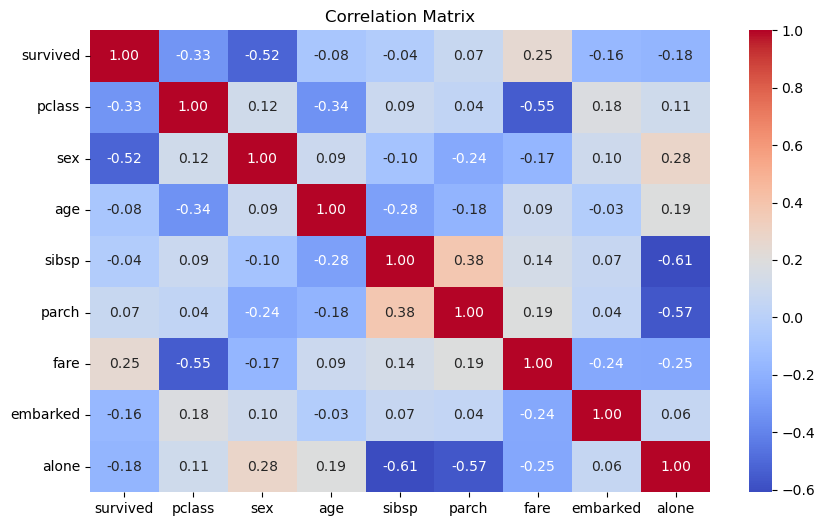

In [409]:
# Correlation Matrix (Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [411]:
# Training the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.7197


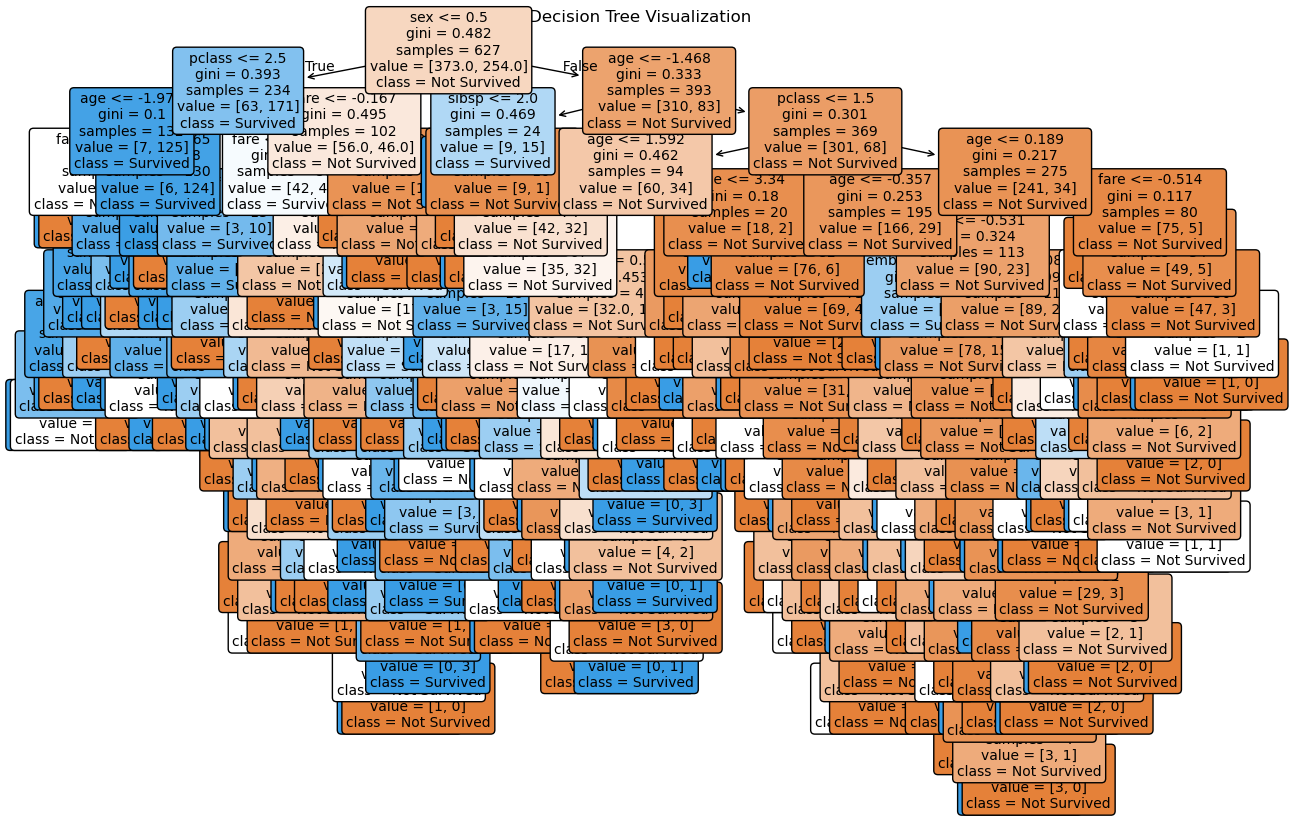

In [413]:
# Decision Tree Model
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

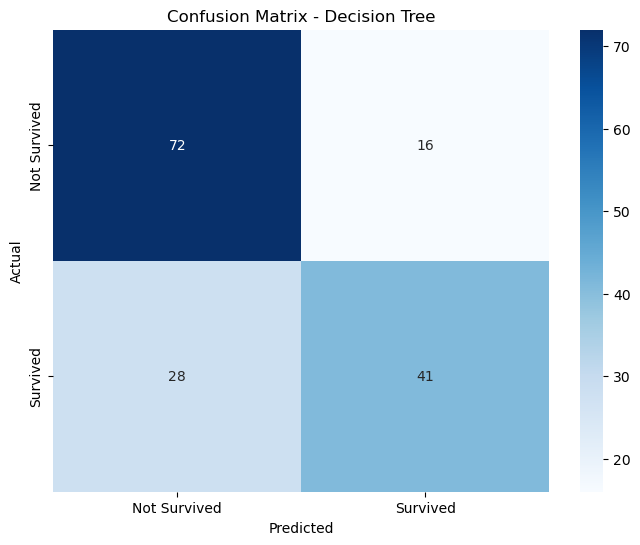

In [414]:
# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [415]:
# Training the Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.7516


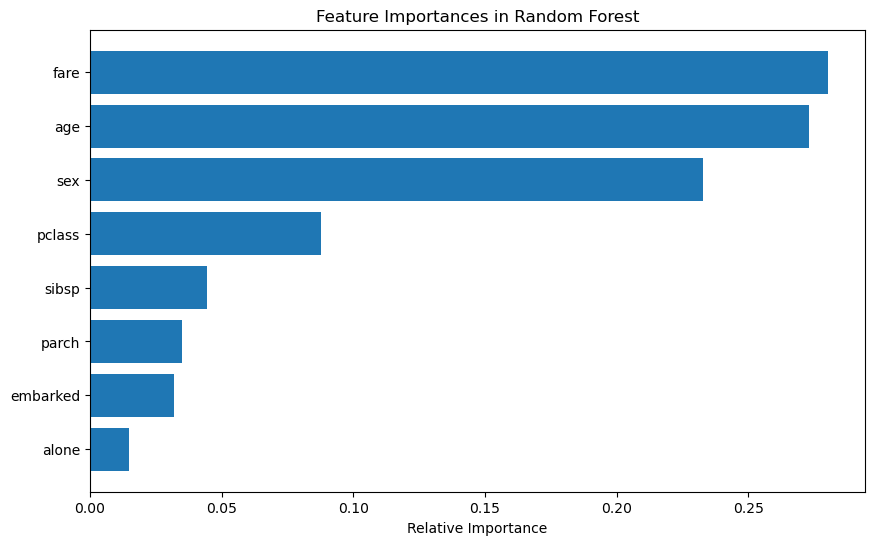

In [417]:
# Feature Importance in Random Forest
importances = rf_model.feature_importances_
indices = importances.argsort()
plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Random Forest')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

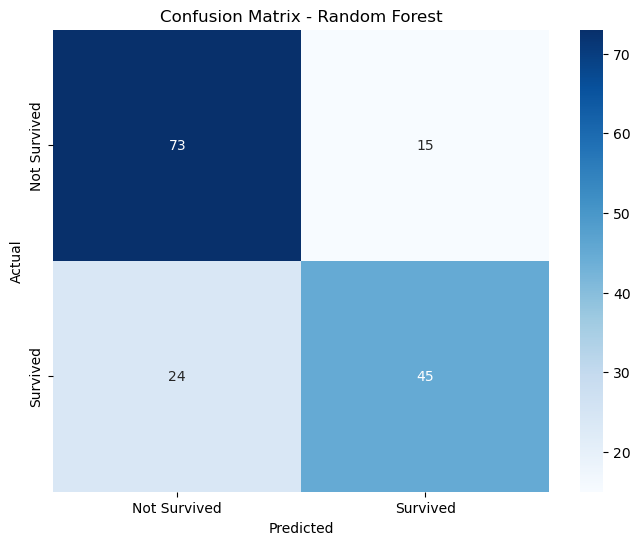

In [421]:
# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()